In [21]:
import pandas as pd
import numpy as np

from IPython.display import Image
from io import StringIO
import pydotplus
from sklearn.tree import export_graphviz

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold

import eli5
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.pipeline import FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import mean_squared_log_error

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

import lightgbm as lgb


cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

df_train = pd.read_csv('sf04classification/train.csv', encoding='utf8', index_col='_id')
df_test = pd.read_csv('sf04classification/test.csv', encoding='utf8', index_col='_id')


def preproc_data(df_input):
    df_output = df_input.copy()
    
    df_output['default'] = df_output['default'].apply(lambda x: 0 if x == 'no' else 1)
    
#    df_output = df_output.drop(['month', 'day_of_week', 'pdays', 'nr.employed',
#                                'job', 'education', 'marital', 'housing', 'previous'], axis = 1)

    # category code
    df_output = pd.get_dummies(df_output, columns=['month', 'day_of_week', 'pdays', 'nr.employed',
                                                   'job', 'education', 'marital', 'housing', 'previous',
                                                   'loan', 'poutcome', 'contact'])
        
    return df_output

x = preproc_data(df_train).drop(['target'], axis=1)
y = df_train['target']



x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


Automatically created module for IPython interactive environment


Load data...
Start training...
[10]	training's l2: 0.0685131	training's l1: 0.156193	valid_1's l2: 0.0695207	valid_1's l1: 0.157504
[20]	training's l2: 0.0611393	training's l1: 0.137335	valid_1's l2: 0.062755	valid_1's l1: 0.139384
[30]	training's l2: 0.0583887	training's l1: 0.127523	valid_1's l2: 0.0603799	valid_1's l1: 0.130134
[40]	training's l2: 0.0571233	training's l1: 0.122169	valid_1's l2: 0.0593853	valid_1's l1: 0.125037
[50]	training's l2: 0.0562561	training's l1: 0.119619	valid_1's l2: 0.0588152	valid_1's l1: 0.122768
[60]	training's l2: 0.0555782	training's l1: 0.118101	valid_1's l2: 0.0584311	valid_1's l1: 0.121532


/usr/local/lib/python3.6/site-packages/lightgbm/basic.py:1042: UserWarning: categorical_feature in Dataset is overridden. New categorical_feature is [21]
  warnings.warn('categorical_feature in Dataset is overridden. New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.6/site-packages/lightgbm/basic.py:685: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


[70]	training's l2: 0.0550536	training's l1: 0.117356	valid_1's l2: 0.0582466	valid_1's l1: 0.121127
[80]	training's l2: 0.0546413	training's l1: 0.116862	valid_1's l2: 0.058097	valid_1's l1: 0.120773
[90]	training's l2: 0.0542283	training's l1: 0.116422	valid_1's l2: 0.0579818	valid_1's l1: 0.120599
[100]	training's l2: 0.0539071	training's l1: 0.116015	valid_1's l2: 0.0579616	valid_1's l1: 0.120465
Plot metrics recorded during training...


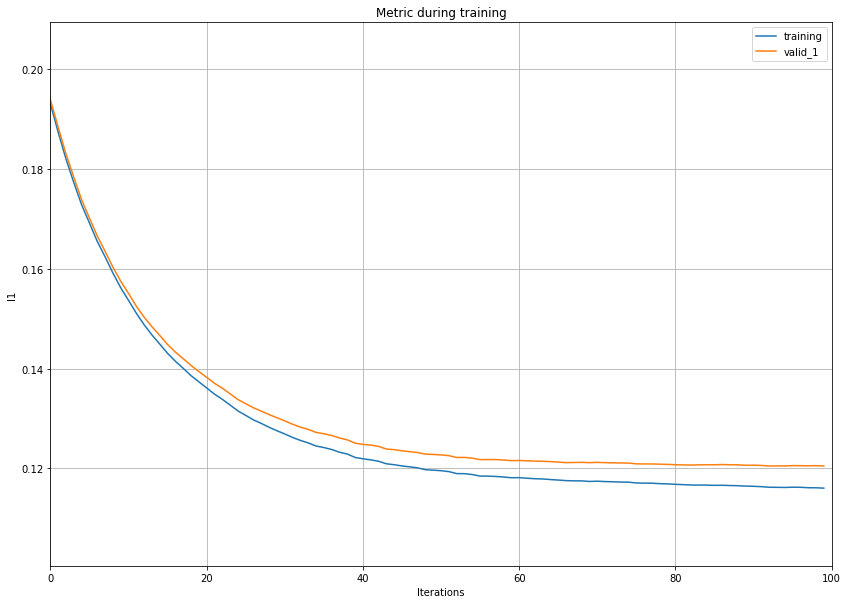

Plot feature importances...


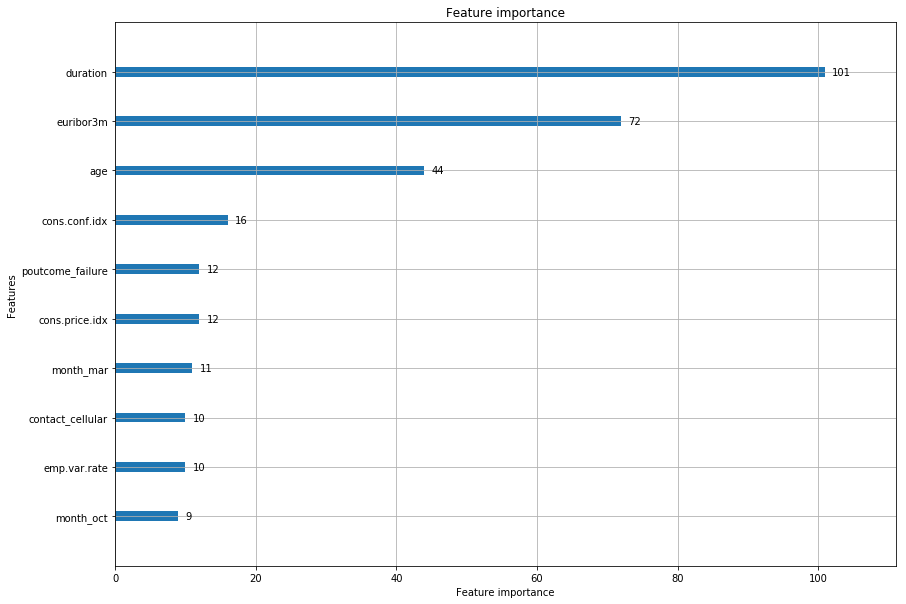

Plot 84th tree...


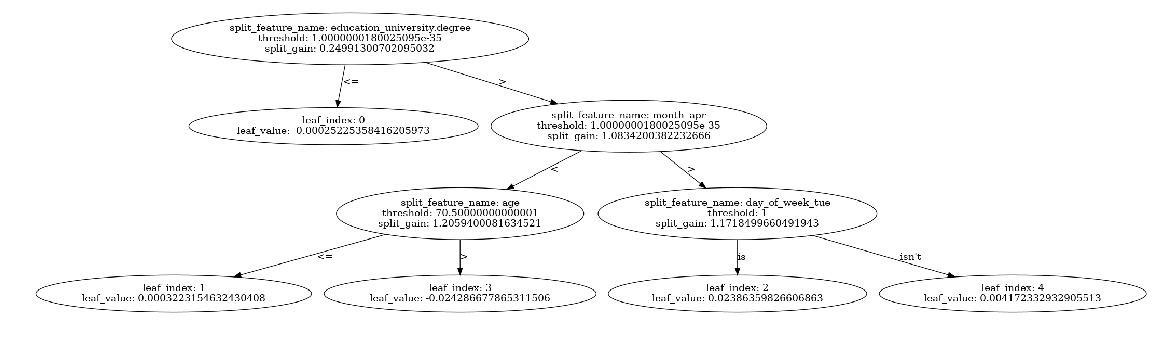

Plot 84th tree with graphviz...


'Tree84.gv.pdf'

In [22]:
print('Load data...')

# create dataset for lightgbm
lgb_train = lgb.Dataset(x_train, y_train)
lgb_test = lgb.Dataset(x_test, y_test, reference=lgb_train)

# specify your configurations as a dict
params = {
    'num_leaves': 5,
    'metric': ('l1', 'l2'),
    'verbose': 0
}

evals_result = {}  # to record eval results for plotting

print('Start training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=[lgb_train, lgb_test],

                categorical_feature=[21],
                evals_result=evals_result,
                verbose_eval=10)

print('Plot metrics recorded during training...')
ax = lgb.plot_metric(evals_result, metric='l1')
plt.show()

print('Plot feature importances...')
ax = lgb.plot_importance(gbm, max_num_features=10)
plt.show()

print('Plot 84th tree...')  # one tree use categorical feature to split
ax = lgb.plot_tree(gbm, tree_index=83, figsize=(20, 8), show_info=['split_gain'])
plt.show()

print('Plot 84th tree with graphviz...')
graph = lgb.create_tree_digraph(gbm, tree_index=83, name='Tree84')
graph.render(view=True)

In [6]:
lr = LogisticRegression(n_jobs=-1, class_weight='balanced', solver='newton-cg', multi_class='multinomial')

In [7]:
print('LogisticRegression ROC_AUC: {}'.format(np.mean(
    cross_val_score(lr, x, y, scoring='roc_auc', cv=cv.split(x, y)))))

/usr/lib64/python3.6/site-packages/scipy/optimize/linesearch.py:461: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/lib64/python3.6/site-packages/scipy/optimize/linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/lib64/python3.6/site-packages/scipy/optimize/linesearch.py:461: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/lib64/python3.6/site-packages/scipy/optimize/linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/lib64/python3.6/site-packages/scipy/optimize/linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', Line

LogisticRegression ROC_AUC: 0.9270904983605643


In [ ]:
lr = LogisticRegression(n_jobs=-1, class_weight='balanced', solver='newton-cg', multi_class='multinomial')

dtc = DecisionTreeClassifier(max_depth=100, criterion='entropy')

knn = KNeighborsClassifier(n_jobs=-1, n_neighbors=1000, algorithm="brute", weights="distance")

In [ ]:
print('DecisionTreeClassifier ROC_AUC: {}'.format(np.mean(
    cross_val_score(dtc, x, y, scoring='roc_auc', cv=cv.split(x, y)))))
print('KNeighborsClassifier ROC_AUC: {}'.format(np.mean(
    cross_val_score(knn, x, y, scoring='roc_auc', cv=cv.split(x, y)))))
print('LogisticRegression ROC_AUC: {}'.format(np.mean(
    cross_val_score(lr, x, y, scoring='roc_auc', cv=cv.split(x, y)))))

In [ ]:
df_test = pd.read_csv('sf04classification/test.csv', encoding='utf8')
ans = lr.predict_proba(preproc_data(df_test.drop(['_id'], axis=1)))[:,1]
result = pd.DataFrame()
result['_id'] = df_test['_id']
result['target'] = ans
result.to_csv('submit.csv', index=False)

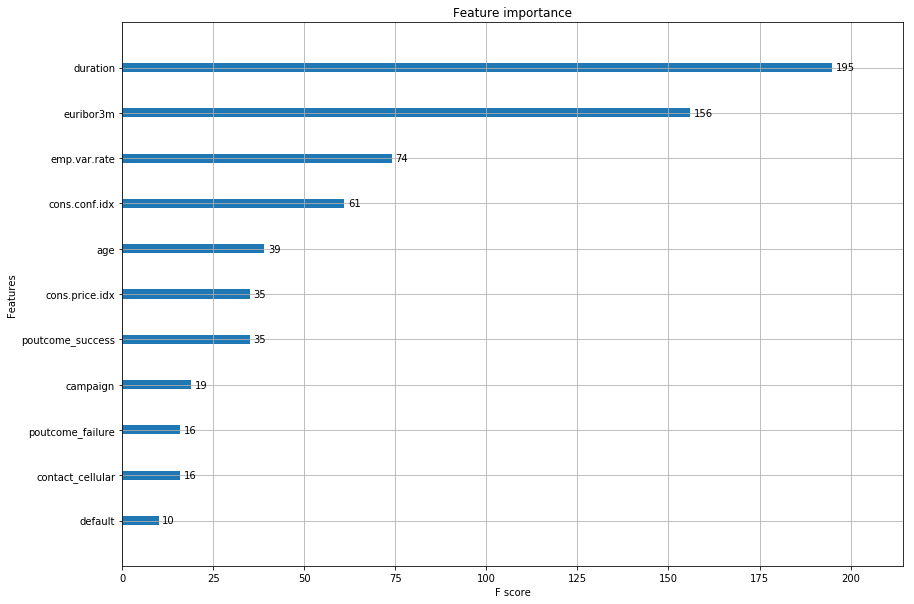

In [9]:
# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from xgboost import plot_importance

x = preproc_data(df_train).drop(['target'], axis=1)
y = df_train['target']

# fit model no training data
model = XGBClassifier()
model.fit(x, y)
# feature importance
#print(model.feature_importances_)
# plot
#pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
#pyplot.show()

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 14
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size


plot_importance(model)
plt.show()

In [ ]:
#my 
def preproc_data(df_input):
    df_output = df_input.copy()
    
    df_output = df_output.drop(['month', 'day_of_week', 'default',
                                'contact', 'pdays', 'nr.employed',
                               'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m'], axis = 1)

    # category code
    df_output = pd.get_dummies(df_output, columns=['job', 'marital', 'education', 'housing', 'loan', 'poutcome'])
        
    return df_output


#my2
# LogisticRegression ROC_AUC: 0.9270904983605643
def preproc_data(df_input):
    df_output = df_input.copy()
    
    df_output['default'] = df_output['default'].apply(lambda x: 0 if x == 'no' else 1)
    
    df_output = df_output.drop(['month', 'day_of_week', 'pdays', 'nr.employed',
                                'job', 'education', 'marital', 'housing', 'previous'], axis = 1)

    # category code
    df_output = pd.get_dummies(df_output, columns=[ 'loan', 'poutcome', 'contact'])
        
    return df_output


#ivan
# LogisticRegression ROC_AUC: 0.9254685244420802
def preproc_data(df_input):
    df_output = df_input.copy()
    
    df_output = df_output.drop(['month', 'day_of_week', 'default', 'contact', 'pdays', 'nr.employed'], axis = 1)

    # category code
    df_output = pd.get_dummies(df_output, columns=['job', 'marital', 'education', 'housing', 'loan', 'poutcome'])
        
    return df_output

#katya
# LogisticRegression ROC_AUC: 0.9260193762115682
def preproc_data(df_input):
    df_output = df_input.copy()
    
    df_output['default'] = df_output['default'].apply(lambda x: 0 if x == 'no' else 1)
    
    df_output = df_output.drop(['month', 'day_of_week', 'contact', 'pdays', 'nr.employed'], axis = 1)

    # category code
    df_output = pd.get_dummies(df_output, columns=['job', 'marital', 'education', 'housing', 'loan', 'poutcome'])
        
    return df_output